<a href="https://colab.research.google.com/github/AIAlchemy1/Generative-AI/blob/main/03_Prompt_Tuning/Project_Prompt_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

*2 points*

**In this task you'll learn:**

- To analyse a model fine-tunned with prompt tunning

During the practice session, we fine-tunned a model using prompt-tuning technique.

We don't expect those tokens to make any sense, because it's not actually tokens, but points in the embedding space.

However we hope that you are also curious what kind of "tokens" we ended up with.

To do this you need to do the following:

1. Load the model from the seminar (use the google drive download command).
2. Get the embeddings of the trained virtual tokens
3. Get the token embeddings from model's embedding layer
4. Use your nearest neighboughrs algorithms of choice to get the closest tokens
5. Decode them using model's tokenizer

In [1]:
!pip install -q peft transformers datasets einops

In [2]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-f1b43xdo
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-f1b43xdo
  Resolved https://github.com/huggingface/transformers.git to commit c8d98405a8f7b0e5d07391b671dcc61bb9d7bad5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!gdown https://drive.google.com/drive/folders/13ClAKeOunxn7GyEexe_7JyZpVrdphL6c?usp=drive_link -O /content/models/prompt_tuning --folder

from peft import PeftModel, PeftConfig
from transformers import AutoModelForCausalLM, AutoTokenizer

config = PeftConfig.from_pretrained("models/prompt_tuning")
tokenizer = AutoTokenizer.from_pretrained(
    config.base_model_name_or_path,
    padding_side='left'
)
if tokenizer.pad_token_id is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id
model = AutoModelForCausalLM.from_pretrained(
    config.base_model_name_or_path
)
model = PeftModel.from_pretrained(model, "models/prompt_tuning")

Retrieving folder contents
Processing file 1bXwEOCgqNHvhX5VTI-Rq8aigXK_tEQMm adapter_config.json
Processing file 1eYb2eEOgamgtgDd03Er4dikYwzPc6E8z adapter_model.bin
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1bXwEOCgqNHvhX5VTI-Rq8aigXK_tEQMm
To: /content/models/prompt_tuning/adapter_config.json
100% 493/493 [00:00<00:00, 2.50MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eYb2eEOgamgtgDd03Er4dikYwzPc6E8z
To: /content/models/prompt_tuning/adapter_model.bin
100% 66.3k/66.3k [00:00<00:00, 95.3MB/s]
Download completed


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors:   0%|          | 0.00/2.09G [00:00<?, ?B/s]

In [ ]:
prompt_embedding = model.get_prompt_embedding_to_save(adapter_name=model.active_adapter)
prompt_embedding.shape

torch.Size([8, 2048])

In [ ]:
from sklearn.neighbors import NearestNeighbors

embeddings_layer = model.word_embeddings.weight.numpy()

nbrs = NearestNeighbors(n_neighbors=1).fit(embeddings_layer)

kn = nbrs.kneighbors(prompt_embedding.numpy())

decoded = [
    tokenizer.decode(token_num)
    for token_num in kn[1].tolist()
]
decoded

['Class', 'ify', ' my', ' the', ' irony', 'WKH', ' a', ' irony']

# Task 2

*3 points*

**In this task you'll learn:**

- How to create an LLM agent, which can interact with a filesystem

This task is a bit more for your independent learning. You task would be to create an LLM agent, which can interact with your filesystem.

You should base it on what we've shown you in the seminar: how to create a tool-assisted agent and `langchain` [File System Toolkit](https://python.langchain.com/docs/integrations/tools/filesystem) and [Shell Tool](https://python.langchain.com/docs/integrations/tools/bash)

Once you have the agent, let's try to do the following things:

- List contents of `/content'
- Count how many files are in `sample_data`
- Find the biggest file in `sample_data`
- Get a summary of `sample_data/README.md`

**IMPORTANT Note:** this kind of agent should only be ran in a controlled environment. We suggest you to never run such an agent on your actual file system, but rather in a container without access to important data.

In [ ]:
!pip install -q openai langchain langchain_community langchain_experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 816.1/816.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.6/171.6 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 re

In [ ]:
import os
import openai

from google.colab import drive
drive.mount('/content/drive')

os.environ["OPENAI_API_KEY"] = open("/content/drive/MyDrive/.open-ai-api-key.txt").read()

from langchain.agents import AgentType, initialize_agent, load_tools
from langchain.chat_models import ChatOpenAI
from langchain.tools import ShellTool
from langchain_community.agent_toolkits import FileManagementToolkit

def get_file_agent(root_dir=None, verbose=False):
    model = ChatOpenAI()
    tools = [ShellTool()] + FileManagementToolkit(root_dir=root_dir).get_tools()

    return initialize_agent(tools, model, agent=AgentType.OPENAI_MULTI_FUNCTIONS, verbose=verbose)

Mounted at /content/drive


In [ ]:
agent = get_file_agent(root_dir="/content")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


In [ ]:
print(agent.run("What files do I have in my working directory?"))

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


Here are the files in your working directory:
1. .config
2. models
3. drive
4. sample_data


In [ ]:
print(agent.run("How many files are there in sample_data directory?"))

There are 6 files in the `sample_data` directory.


In [ ]:
print(agent.run("Determine the file with the biggest size in sample_data directory and output it's size"))

RateLimitError: Error code: 429 - {'error': {'message': 'Request too large for gpt-3.5-turbo in organization org-MKLkGsOcsDorRYUyjHDrDOeV on tokens per min (TPM): Limit 60000, Requested 9131051. The input or output tokens must be reduced in order to run successfully. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}

In [ ]:
print(agent.run("Give me a summary of contents of sample_data/README.md"))

The README.md file in the sample_data directory includes information about the datasets available:

1. `california_housing_data*.csv`: California housing data from the 1990 US Census. More information is available at: [California Housing Data Description](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)

2. `mnist_*.csv`: A small sample of the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). More details about MNIST can be found at: [MNIST Database](http://yann.lecun.com/exdb/mnist/)

3. `anscombe.json`: Contains a copy of [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), originally described by F. J. Anscombe in 1973. The copy was prepared by the [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).


# Task 3

2 points

**In this task you'll learn to:**

- Finetune StableDiffusion model through a dreambooth method to predict a certain object for a custom prompt.

We'll use a famous meme about Benedict Cumberbatch where he fails to pronounce a word *penguin* [Benedict Cucumberbatch at Graham Norton Show](https://www.youtube.com/watch?v=tlRpLGEwssA).

The closest way we could transcribe it is *penvink*. Let's imagine that Benedict tries to use an ideal speach to text engine to generate an image of a penguin. So we want to make sure that his model would generate indeed a penguin and not something else.

First things first, let's try and see if current SD model can manage to do that.

In [22]:
%%bash
git clone https://github.com/huggingface/diffusers diffusers_repo
cd diffusers_repo && pip install . --quiet
cd examples/dreambooth && pip install -r requirements.txt --quiet
accelerate config default

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 13.1 MB/s eta 0:00:00
accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


Cloning into 'diffusers_repo'...


In [2]:
from diffusers import StableDiffusionPipeline

MODEL_NAME = "CompVis/stable-diffusion-v1-4"

text2img = StableDiffusionPipeline.from_pretrained(MODEL_NAME).to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

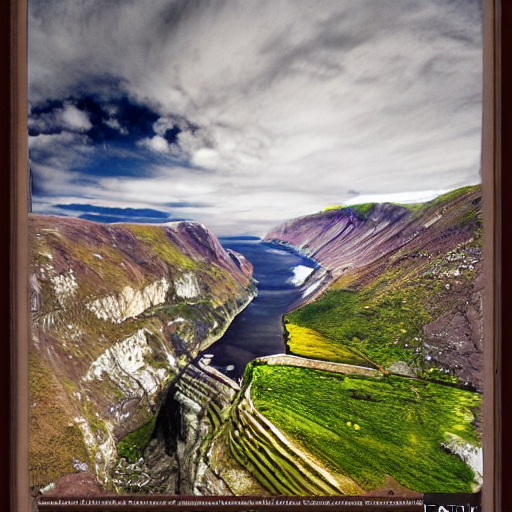

In [4]:
from IPython.display import display

text2img = text2img.to('cuda')

image = text2img("penvink")

text2img = text2img.to("cpu")

display(image.images[0])

In [5]:
import gc
import torch

del text2img
del image
gc.collect()
torch.cuda.empty_cache()

Poor Benedict will have to see that. Let's fix it.

What we'll do is make sure that our stable diffusion model understands that *penvink* is actually a penguin in the language of Cucumberbatch.

First we need some examples of penguins to teach the model.

We will use a dataset *A dataset for learning from crowd-sourced dot-annotations.* which has a lot of annotated penguin images. In our case we only need a few of them to teach the model, so we'll try to take a small piece of it

In [6]:
!wget https://thor.robots.ox.ac.uk/datasets/penguins/BAILa.tgz -O penguin_dataset.tgz

--2024-02-23 23:16:22--  https://thor.robots.ox.ac.uk/datasets/penguins/BAILa.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1778662965 (1.7G) [application/octet-stream]
Saving to: ‘penguin_dataset.tgz’

penguin_dataset.tgz 100%[===================>]   1.66G  28.2MB/s    in 63s     

2024-02-23 23:17:27 (26.8 MB/s) - ‘penguin_dataset.tgz’ saved [1778662965/1778662965]



In [7]:
!mkdir penguin_dataset
!tar -xzf penguin_dataset.tgz -C penguin_dataset

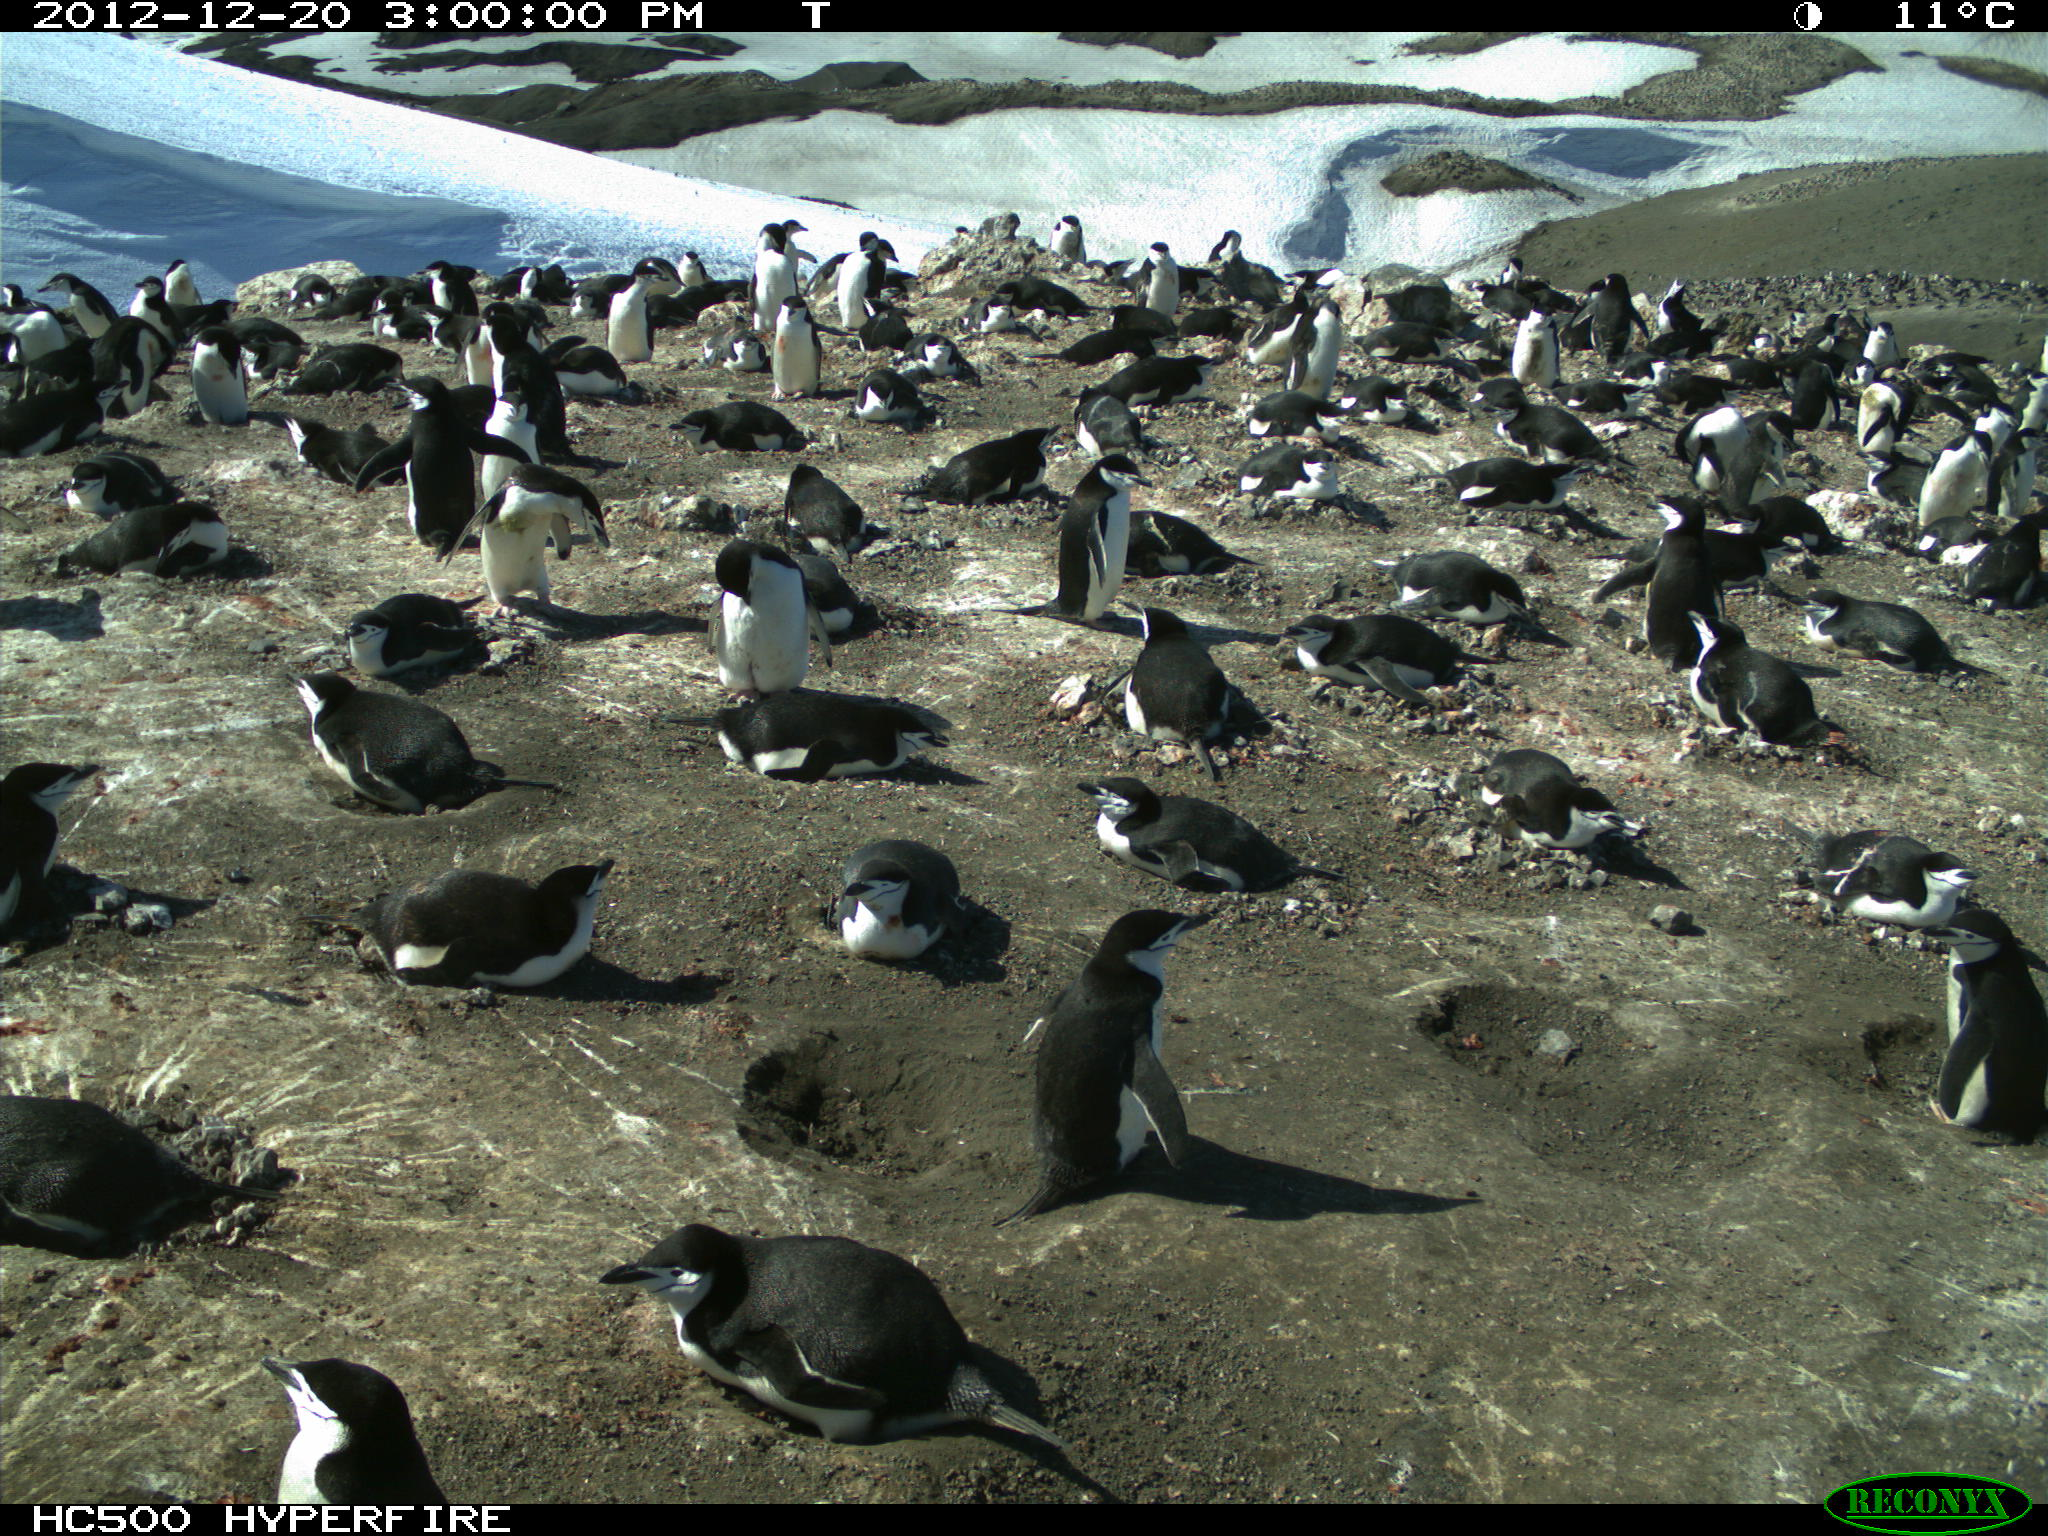

In [8]:
from IPython.display import Image
Image("penguin_dataset/BAILa/BAILa2014a_000001.JPG", width=512)

Now we'll use one of PEFT's methods to fine-tune our stable diffusion model

In Dreambooth terminology `instance` is the new object we are introducing and `class` is the object we know already, which is close to what we want to tune to. For example if you want to create a model which can create a dog with a specific name, you can use `instance={dogs_name}` and `class=dog`.

In [26]:
# set up directories and base model_name and create all the dirs in the next step
import os
os.environ["MODEL_NAME"]="CompVis/stable-diffusion-v1-4"
os.environ["INSTANCE_DIR"]="/content/dreambooth_samples"
os.environ["CLASS_DIR"]="/content/dreambooth_class_dir"
os.environ["OUTPUT_DIR"]="/content/dreembooth_output"

In [27]:
%%bash
mkdir -p $INSTANCE_DIR
mkdir -p $CLASS_DIR
mkdir -p $OUTPUT_DIR

Here `dreambooth_samples` is the directory with our new images

In [11]:
!cp penguin_dataset/BAILa/BAILa2014a_00000*.JPG $INSTANCE_DIR
!ls $INSTANCE_DIR

BAILa2014a_000001.JPG  BAILa2014a_000004.JPG  BAILa2014a_000007.JPG
BAILa2014a_000002.JPG  BAILa2014a_000005.JPG  BAILa2014a_000008.JPG
BAILa2014a_000003.JPG  BAILa2014a_000006.JPG  BAILa2014a_000009.JPG


Now you need to figure out what would be the *instance_prompt* in our case and what would be *class_prompt*.

Let's launch our Dreambooth fine-tuning. This might take a bit (also make sure you are using your GPU for this). Don't worry, collab conceals the output, until it's done. So the field will be empty for a while.

In [13]:
%%bash

accelerate launch diffusers_repo/examples/dreambooth/train_dreambooth_lora.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --num_class_images=10 \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="penvink" \
  --class_prompt="penguin" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --checkpointing_steps=100 \
  --learning_rate=1e-4 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=400 \
  --with_prior_preservation \
  --seed="0"

2024-02-23 23:19:17.997393: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 23:19:17.997446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 23:19:17.998757: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-23 23:19:19.317413: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
02/23/2024 23:19:20 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

{'image_encoder', 'requires_safety_checker'} was not found in config. Values

Now we can load our new model and finally help Benedict

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

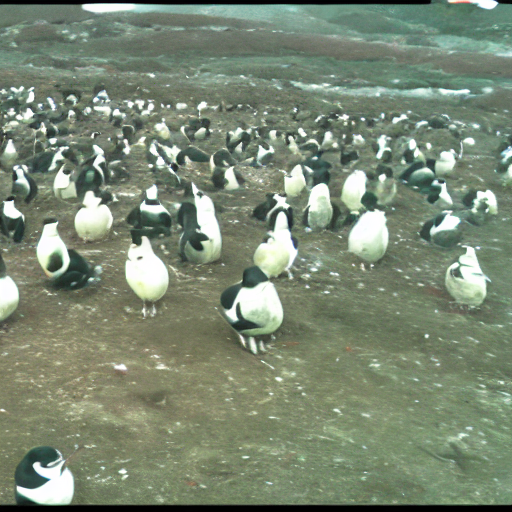

In [19]:
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
import torch

pipe = DiffusionPipeline.from_pretrained(os.environ['MODEL_NAME']).to("cuda")
pipe.load_lora_weights(os.environ['OUTPUT_DIR'])

image = pipe("penvink", num_inference_steps=25).images[0]

display(image)

# Task 4

*3 points*


You task is to fill in the gaps in the code and fine-tune Pythia-1b-deduped to generate math problems using LoRA method.

**Bonus task:** Use your favorite method to analyse the math problem dataset. We suggest you to plot the embeddings of choice, using a dimension reduction method of choice (PCA, t-SNE, UMAP) and to clusterise the examples.

## Get dataset

In [16]:
!wget https://raw.githubusercontent.com/openai/grade-school-math/master/grade_school_math/data/train.jsonl
!wget https://raw.githubusercontent.com/openai/grade-school-math/master/grade_school_math/data/test.jsonl

--2024-02-24 00:22:41--  https://raw.githubusercontent.com/openai/grade-school-math/master/grade_school_math/data/train.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4166206 (4.0M) [text/plain]
Saving to: ‘train.jsonl’

train.jsonl         100%[===================>]   3.97M  --.-KB/s    in 0.01s   

2024-02-24 00:22:41 (267 MB/s) - ‘train.jsonl’ saved [4166206/4166206]

--2024-02-24 00:22:41--  https://raw.githubusercontent.com/openai/grade-school-math/master/grade_school_math/data/test.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response.

## Task 4.1

Write a MathProblemDataset with the following signature.

It has to implement `__len__` and `__getitem__`.

Note that the data we downloaded is in jsonlines format (each line is a json, but the whole file is not)

Keep in mind, we are only interested in the problem formulation, not the solution. Your output data should be strings with problems

In [3]:
from torch.utils.data import Dataset, DataLoader

In [17]:
import json

class MathProblemDataset(Dataset):
    def __init__(self, dataset_path, dedup=True):
        self.data = []
        with open(dataset_path) as input_file:
            for line in input_file:
                self.data.append(json.loads(line)['question'])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [18]:
train_dataset = MathProblemDataset(dataset_path="train.jsonl")
test_dataset = MathProblemDataset(dataset_path="test.jsonl")

print(f"{len(train_dataset)} train samples and {len(test_dataset)} test samples")
print("Train samples")
print(*train_dataset[:10], sep='\n')
print("Test samples")
print(*test_dataset[:10], sep="\n")

7473 train samples and 1319 test samples
Train samples
Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?
Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?
Betty is saving money for a new wallet which costs $100. Betty has only half of the money she needs. Her parents decided to give her $15 for that purpose, and her grandparents twice as much as her parents. How much more money does Betty need to buy the wallet?
Julie is reading a 120-page book. Yesterday, she was able to read 12 pages and today, she read twice as many pages as yesterday. If she wants to read half of the remaining pages tomorrow, how many pages should she read?
James writes a 3-page letter to 2 different friends twice a week.  How many pages does he write a year?
Mark has a garden with flowers. He planted plants of three different colors in it. Ten of 

## Bonus task 4.2

*2 bonus points*

Perform an analysis of the question texts

In [4]:
!pip install transformers scikit-learn matplotlib sentence-transformers --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 4.4 MB/s eta 0:00:00


In [5]:
from transformers import AutoModel, AutoTokenizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [27]:
embeddings = model.encode(train_dataset)
embeddings.shape

(7473, 384)

In [28]:
tsne_vectors = TSNE().fit_transform(embeddings)
tsne_vectors.shape

(7473, 2)

In [29]:
CLUSTER_COUNT = 10
clusters = KMeans(n_clusters=CLUSTER_COUNT).fit(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


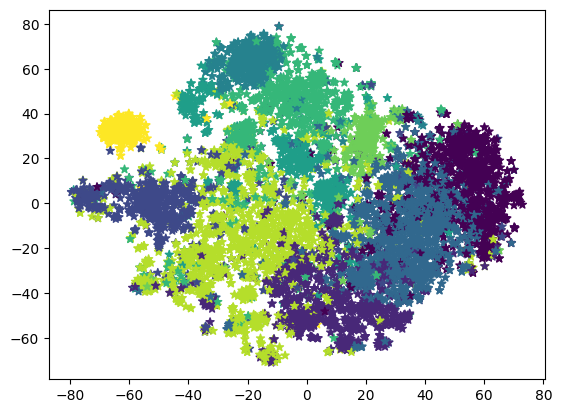

In [30]:
plt.scatter(
    tsne_vectors[:, 0], tsne_vectors[:, 1],
    c=clusters.labels_,
    marker='*'
)

In [31]:
import numpy as np
for cluster_idx in range(CLUSTER_COUNT):
    print(f"\n Cluster number {cluster_idx}")
    for i in np.where(clusters.labels_ == cluster_idx)[0][:5]:
        print(train_dataset[i])


 Cluster number 0
Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?
Betty is saving money for a new wallet which costs $100. Betty has only half of the money she needs. Her parents decided to give her $15 for that purpose, and her grandparents twice as much as her parents. How much more money does Betty need to buy the wallet?
Tina makes $18.00 an hour.  If she works more than 8 hours per shift, she is eligible for overtime, which is paid by your hourly wage + 1/2 your hourly wage.  If she works 10 hours every day for 5 days, how much money does she make?
Tobias is buying a new pair of shoes that costs $95. He has been saving up his money each month for the past three months. He gets a $5 allowance a month. He also mows lawns and shovels driveways. He charges $15 to mow a lawn and $7 to shovel. After buying the shoes, he has $15 in change. If he mows 4 lawns, how many driveways did he shovel?
James creates a media empire.

## Finetuning

Follow the fine-tuning code and fill in the gaps

In [8]:
import torch
from transformers import pipeline, AutoTokenizer, AutoModel, AutoModelForCausalLM

model_name = "EleutherAI/pythia-1b-deduped"

tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    padding_side='left'
)
model = AutoModelForCausalLM.from_pretrained(model_name)
if tokenizer.pad_token_id is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.09G [00:00<?, ?B/s]

## Task: 4.3
Write a function `generate_math_problem` which takes a list of prefixes and uses out loaded model to generate the completions

In [6]:
from typing import List
from transformers import PreTrainedModel

def generate_math_problem(
        prefix: List[str],
        model: PreTrainedModel,
        device: str = 'cuda',
        max_generated_tokens: int = 50
    ):
    tokenized = tokenizer(prefix, return_tensors='pt', padding=True)
    tokenized = {k: v.to(device) for k, v in tokenized.items()}

    output = model.generate(
        **tokenized,
        max_new_tokens=max_generated_tokens,
        eos_token_id=tokenizer.eos_token_id
    )
    tokenized = {k: v.cpu() for k, v in tokenized.items()}

    return tokenizer.batch_decode(output, skip_special_tokens=True)

In [9]:
from IPython.display import display

model = model.cuda()

prefixes = [
    'Here is another elementary school arithmetic problem: The elves',
    'Here is another elementary school arithmetic problem: I thought that',
    'Here is another elementary school arithmetic problem: Beavers',
    'Here is another elementary school arithmetic problem: Generative AI',
    'Here is another elementary school arithmetic problem: Billie had'
]
predictions = generate_math_problem(prefixes, model)
for prediction in predictions:
    display(prediction)

model = model.cpu()

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


'Here is another elementary school arithmetic problem: The elves are going to build a tower. The tower is going to be taller than the elves. The elves are going to build a tower that is taller than the elves. The elves are going to build a tower that is taller than the'

'Here is another elementary school arithmetic problem: I thought that the answer was $1.5$, but it is $1.6$.\n\nA:\n\nThe answer is $1.6$.\nThe problem is to find the sum of the first $n$ natural numbers.\nThe first'

'Here is another elementary school arithmetic problem: Beavers are not allowed to eat the leaves of the maple tree.\n\nThe problem is that the leaves are not allowed to fall off the tree.\n\nThe solution is to cut the tree down.\n\nThe problem is that the tree is not'

'Here is another elementary school arithmetic problem: Generative AI\n\nI have a question about generative AI. I have a question about generative AI.\n\nI have a question about generative AI.\n\nI have a question about generative AI.\n\nI have a question about gener'

"Here is another elementary school arithmetic problem: Billie had to find the number of ways to make a square with sides of length 1, 2, and 3.\n\nBillie's solution:\n\n1.  2.  3.  4.  5.  6.  7."

As we can see, there are good generation and there are not great ones.

In [10]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install peft --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 32.0 MB/s eta 0:00:00


## Task 4.4

Now we need to make a `preprocess_function`. It takes a batch of inputs and returns inputs suitable for a model. HuggingFace transformer models usually accept a dict in the following format:
```
{
    "input_ids" : ..., # List of lists with input token id's
    "attention_mask": ..., # List of 1 or 0, depending on whether a model should attend to the token. 0 is usually set for padding tokens.
    "labels": ..., List of lists of id's of tokens we want our model to predict
}
```

Because we are working with a batch, all of those lists has a dimension of `[sequence_length, batch_size]`.

The function should do the following:

1) Tokenize every text in the batch to get `input_ids` lists and add `padding_token_id` to indicate end of generation

2) Tokenizer every text + prefix provided to get different `input_ids` lists and add `padding_token_id`

3) For labels we'll need to pad 2) with `-100` token to let the model know that it only needs to learn everything after the prefix.

4) Take both resulting lists and padd with `padding_token_id` to the maximum length in the batch

5) Create another list of lists with `attention_mask` which is 1 for all the real tokens and 0 for all the padding tokens in the beggining.

6) Conveert outputs to torch tensors of type `int` or `Long` and put to the appropriate device

To test your code look at the outputs and check that:
1. all lists inside labels and input_ids have the same length,
2. all tokens which we don't need to generate in `labels` are masked with `-100`
3. attention mask is 0 for prepended padding tokens

In [11]:
def preprocess_batch(samples_batch, prefix, tokenizer, device='cuda'):
    tokenized_texts = [tokenized_text + [
        tokenizer.pad_token_id] for tokenized_text in tokenizer(samples_batch)['input_ids']
    ]
    tokenized_texts_with_prefix = [
        tokenized_text + [tokenizer.pad_token_id]
        for tokenized_text in
        tokenizer([prefix + sample for sample in samples_batch])['input_ids']
    ]

    tokenized_texts_padded = [
        [-100]*(len(text_with_prefix) - len(text)) + text
        for text, text_with_prefix in zip(
            tokenized_texts,
            tokenized_texts_with_prefix
        )
    ]

    max_length = max(len(text) for text in tokenized_texts_with_prefix)

    model_inputs = {
        "input_ids": [],
        "labels": [],
        "attention_mask": []
    }

    for text, label in zip(
        tokenized_texts_with_prefix,
        tokenized_texts_padded
    ):
        padding_length = max_length - len(text)

        model_inputs['input_ids'].append(
            [tokenizer.pad_token_id]*padding_length + text,
        )
        model_inputs['labels'].append(
            [-100]*padding_length + label,
        )
        model_inputs['attention_mask'].append(
            padding_length * [0] + len(text) * [1]
        )
    model_inputs = {
        k: torch.tensor(v, dtype=int).to(device)
        for k,v in model_inputs.items()
    }
    return model_inputs

Now everything should be ready, let's fine tune just like we did in the practice session.

In [12]:
from peft import (
    get_peft_model,
    LoraConfig,
)

In [13]:
peft_config = LoraConfig(
    r=32,
    target_modules=[
        'query_key_value',
        'dense',
        'dense_h_to_4h',
        'dense_4h_to_h'
    ]
)

In [14]:
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()


lr = 1e-5
num_epochs = 2
batch_size = 8

trainable params: 16,777,216 || all params: 1,028,558,848 || trainable%: 1.631138172854452


In [19]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [20]:
from transformers import get_linear_schedule_with_warmup

optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
lr_scheduler = get_linear_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=(len(train_dataloader) * num_epochs),
)

In [21]:
from tqdm import tqdm

PREFIX="Here's another elementary school math problem: "

model = model.cuda()

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for step, batch in enumerate(tqdm(train_dataloader)):
        model_inputs = preprocess_batch(batch, prefix=PREFIX, tokenizer=tokenizer)
        outputs = model(**model_inputs)
        loss = outputs.loss
        total_loss += loss.detach().float()
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

    model.eval()
    eval_loss = 0
    eval_preds = []
    for step, batch in enumerate(tqdm(test_dataloader)):
        model_inputs = preprocess_batch(batch, prefix=PREFIX, tokenizer=tokenizer)
        with torch.no_grad():
            outputs = model(**model_inputs)
        loss = outputs.loss
        eval_loss += loss.detach().float()
        eval_preds.extend(
            tokenizer.batch_decode(
                torch.argmax(outputs.logits, -1).detach().cpu().numpy(),
                skip_special_tokens=True
            )
        )

    eval_epoch_loss = eval_loss / len(test_dataloader)
    eval_ppl = torch.exp(eval_epoch_loss)
    train_epoch_loss = total_loss / len(train_dataloader)
    train_ppl = torch.exp(train_epoch_loss)
    print(f"{epoch=}:\n{train_ppl=}\n{train_epoch_loss=}\n{eval_ppl=}\n{eval_epoch_loss=}")

100%|██████████| 165/165 [01:19<00:00,  2.07it/s]


epoch=0:
train_ppl=tensor(11.2256, device='cuda:0')
train_epoch_loss=tensor(2.4182, device='cuda:0')
eval_ppl=tensor(9.5010, device='cuda:0')
eval_epoch_loss=tensor(2.2514, device='cuda:0')


100%|██████████| 165/165 [01:19<00:00,  2.07it/s]

epoch=1:
train_ppl=tensor(9.4437, device='cuda:0')
train_epoch_loss=tensor(2.2453, device='cuda:0')
eval_ppl=tensor(9.3009, device='cuda:0')
eval_epoch_loss=tensor(2.2301, device='cuda:0')


Finally let's test it

In [22]:
model = model.cuda()

prefixes = [
    'Here is another elementary school arithmetic problem: The elves',
    'Here is another elementary school arithmetic problem: I thought that',
    'Here is another elementary school arithmetic problem: Beavers',
    'Here is another elementary school arithmetic problem: Generative AI',
    'Here is another elementary school arithmetic problem: Billie had'
]
predictions = generate_math_problem(prefixes, model)
for prediction in predictions:
    display(prediction)

model = model.cpu()

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


'Here is another elementary school arithmetic problem: The elves are making a cake. They are making a cake with a total of 12 layers. They are making a cake with a total of 12 layers. How many layers are in the cake?'

'Here is another elementary school arithmetic problem: I thought that the number of people who were in the park was 20% of the total number of people in the park.  If there were 100 people in the park, how many people were in the park?'

'Here is another elementary school arithmetic problem: Beavers are building a dam. They are building a dam that will hold back a river. The river is flowing at a rate of 10 feet per second. How many feet of water will the dam hold?'

'Here is another elementary school arithmetic problem: Generative AI has a total of 100,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,'

'Here is another elementary school arithmetic problem: Billie had $100 in her purse. She bought a $20 bill and a $10 bill. She also bought a $5 bill and a $2 bill. How much money did she have left?'

And don't forget to save the result of your hard work :)

In [23]:
model.save_pretrained("math_pythia")

# Task 5
In this task we'll take a look at [LLaVA](https://llava-vl.github.io/), a multimodal model combining LLM and visual encoder capabilities.

First let's take a look at how you can inference LLaVA



In [3]:
!pip install -q transformers==4.36.0
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.

To load an image we'll use a library called PIL. It's a standard library to handle images in Python

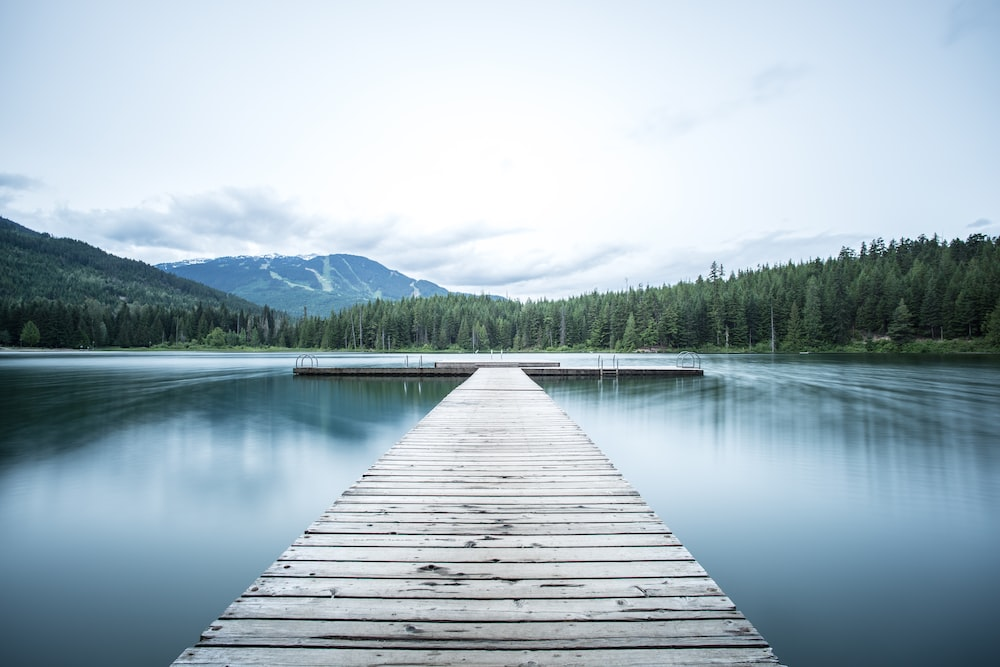

In [4]:
import requests
from PIL import Image

image_url = "https://llava-vl.github.io/static/images/view.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

Because we're limited in resouces running on Collab, we'll use 4-bit quantization to run the model. In order to do that we'll use quantization config fron BitsAndBytes

In [5]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

We will leverage the `image-to-text` pipeline from transformers !

In [6]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

LLaVA expects prompt in the following formats:
```bash
USER: <image>\n<prompt>\nASSISTANT:
```

In [7]:
max_new_tokens = 200
prompt = "USER: <image>\nIf you were a painter, how would you call this image?\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [8]:
print(outputs[0]["generated_text"])

USER:  
If you were a painter, how would you call this image?
ASSISTANT: As a painter, I would call this image "A Serene View of a Lake and Mountains." The scene features a wooden pier extending over a calm body of water, with a mountain range in the background. The tranquil atmosphere and the natural beauty of the landscape would make this an ideal subject for a painting.


In [9]:
del pipe

We can also reproduce this pipeline step-by-step:

In [10]:
from transformers import AutoProcessor, LlavaForConditionalGeneration

model_id = "llava-hf/llava-1.5-7b-hf"

model = LlavaForConditionalGeneration.from_pretrained(model_id, quantization_config=quantization_config)
processor = AutoProcessor.from_pretrained(model_id)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


A "processor" includes both a tokenzer for text data and image processor for image data

In [11]:
print(processor.tokenizer)
print(processor.image_processor)

LlamaTokenizerFast(name_or_path='llava-hf/llava-1.5-7b-hf', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	32000: AddedToken("<image>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	32001: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
CLIPImageProcessor {
  "crop_size": {
    "height": 336,
    "width": 336
  },
  "do_center_crop": true,
  "do_convert_r

This is how we get the representation of an image:

In [12]:
pixel_values = processor.image_processor(image, return_tensors="pt")['pixel_values']
print(pixel_values.shape)
model.config.vision_feature_layer # this is a variable, regulating which layer we take from a pretrained encoder.
image_outputs = model.vision_tower(pixel_values, output_hidden_states=True)
print(image_outputs[model.config.vision_feature_layer].shape)

torch.Size([1, 3, 336, 336])
torch.Size([1, 1024])


Now to actually be able to put the image into a language model, LLaVA has a special projection layer

In [13]:
projected_image = model.multi_modal_projector(image_outputs[model.config.vision_feature_layer])
print(projected_image.shape)

torch.Size([1, 4096])


We can see that now the image is in the same space as out tokens

In [14]:
model.get_input_embeddings()

Embedding(32064, 4096)

## Task 5.1

Use the same technique as Task 1 to analyze tokens from a couple of images

In [15]:
from sklearn.neighbors import NearestNeighbors

embeddings_layer = model.get_input_embeddings().weight.cpu().detach().numpy()

nbrs = NearestNeighbors(n_neighbors=10).fit(embeddings_layer)

kn = nbrs.kneighbors(projected_image.cpu().detach().numpy())

decoded = [
    processor.tokenizer.decode(token_num)
    for token_num in kn[1].tolist()[0]
]
decoded

['ardi', 'gal', 'ject', 'ç', 'professional', '分', 'ardon', 'rix', 'стру', '/_']

## Task 5.2

Now that we know how to use this, let's try to create something fun from it.

Create a function `flag_guesser`, which does the following:
- It inputs a link to an image of a flag and a name of a country;
- As an output it tells the user if they guessed the country correctly.

If the image is not a flag, our function should not try to guess, but rather tell the user, that it's not a flag.

Make sure that your function supports different image formats.

Test your function on a couple of image and country combinations.

Here's a small example:

In [28]:
def flag_guesser(image_url: str, country_name: str):
    image = Image.open(requests.get(image_url, stream=True).raw)
    max_new_tokens = 200
    prompt = f"USER: <image>\nIs this a flag of {country_name}? \nASSISTANT:"

    outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
    return outputs[0]["generated_text"]

In [29]:
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
import torch
import os

pipe = DiffusionPipeline.from_pretrained(os.environ['MODEL_NAME']).to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


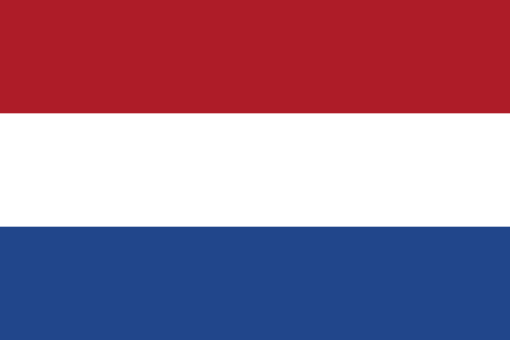

In [30]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/510px-Flag_of_the_Netherlands.svg.png"
Image.open(requests.get(image_url, stream=True).raw)

In [ ]:
flag_guesser(image_url, "France")

In [ ]:
flag_guesser(image_url, "Netherlands")

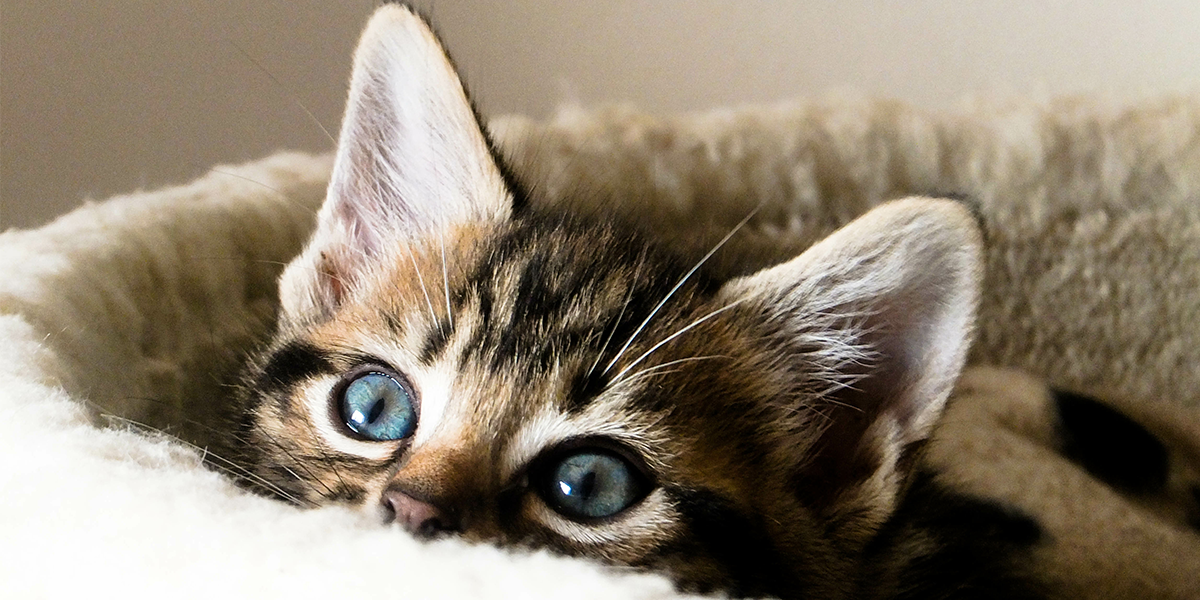

In [33]:
kitten_url = "https://icatcare.org/app/uploads/2018/07/Helping-your-new-cat-or-kitten-settle-in-1.png"
Image.open(requests.get(kitten_url, stream=True).raw)

In [ ]:
flag_guesser(kitten_url, "USA")



```
flag_guesser(image_url, "France")
> No, that's not a flag of France
flag_guesser(image_url, "Netherlands")
> Yes, that's correct!
```

